# Rainfall Prediction ML Project

### Overview
This project predicts rainfall occurrence using meteorological features such as pressure, temperature, humidity, wind speed, and cloud cover. A **Random Forest Classifier** is used for prediction.  

### Workflow
1. Data preprocessing and missing value handling  
2. Exploratory Data Analysis (histograms, boxplots, correlation heatmap)  
3. Feature selection and class balancing  
4. Model training with GridSearchCV  
5. Model evaluation (accuracy, confusion matrix, classification report)  
6. Save/load model using `pickle`  

In [96]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pickle

In [97]:
data = pd.read_csv('Rainfall (1).csv')
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [98]:
data.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [99]:
data.shape


(366, 12)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [101]:
data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [102]:
data.columns = data.columns.str.strip()

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [104]:
data.describe()


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [105]:
data = data.drop(columns = 'day', axis = 1)

In [106]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [107]:
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [108]:
data['winddirection'] = data['winddirection'].fillna(data['winddirection'].mean())

In [109]:
data['windspeed'] = data['winddirection'].fillna(data['windspeed'].median())

In [110]:
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [111]:
rain_data = data.copy()

In [112]:
rain_data['rainfall'] = rain_data['rainfall'].map({'yes': 1, 'no': 0})


In [113]:
rain_data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,80.0
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,50.0
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,40.0
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,50.0
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,40.0


In [114]:
rain_data['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [115]:
rain_data['rainfall'].unique()

array([1, 0])

In [116]:
sns.set(style = 'whitegrid')

In [117]:
rain_data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.506849,101.506849
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.611697,81.611697
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,10.000000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,40.000000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,70.000000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,190.000000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,350.000000


In [118]:
rain_data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

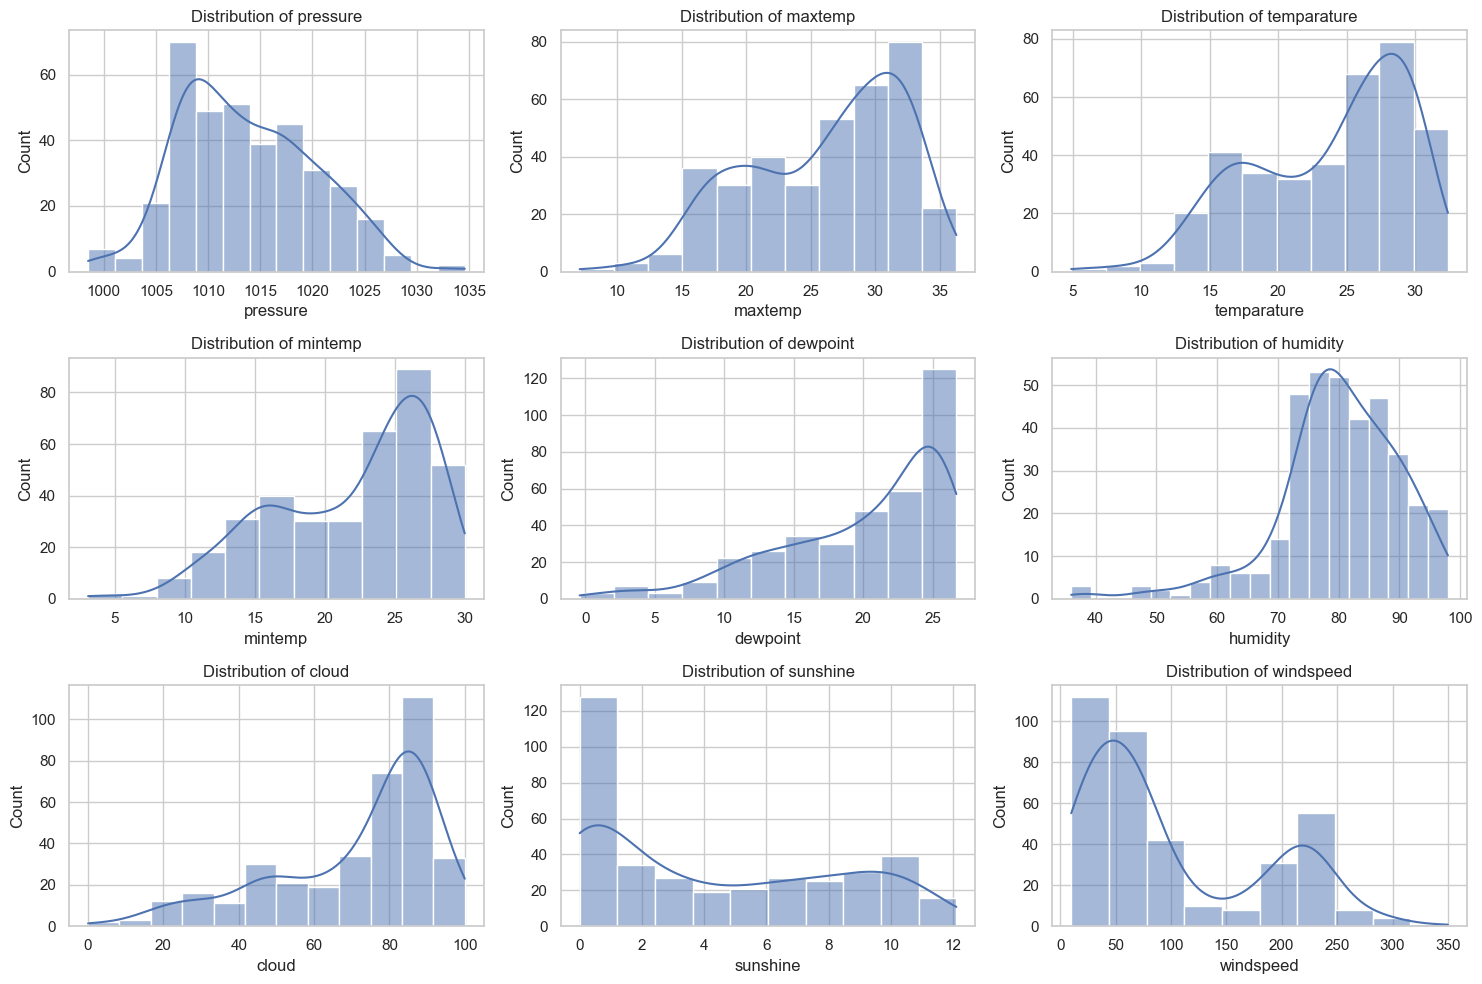

In [119]:
plt.figure(figsize = (15,10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'windspeed'],1):
    plt.subplot(3,3,i)
    sns.histplot(rain_data[column], kde = True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()
    

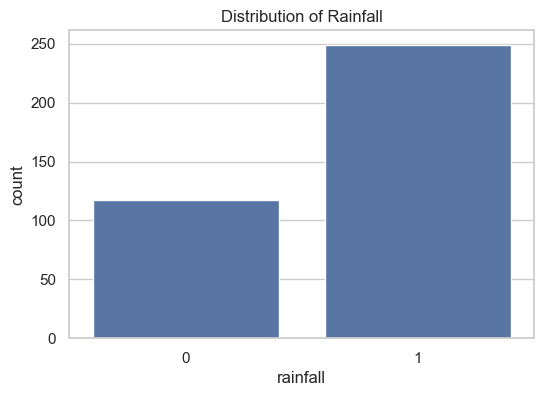

In [120]:
plt.figure(figsize = (6,4))
sns.countplot (x = 'rainfall',data = rain_data)
plt.title('Distribution of Rainfall')
plt.show()

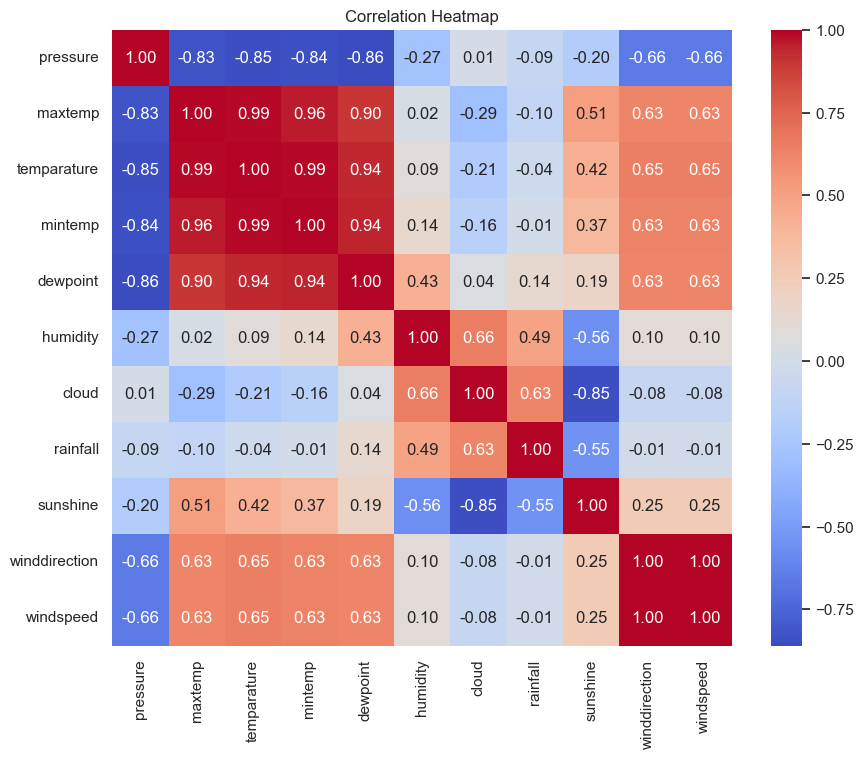

In [121]:
plt.figure(figsize=(10,8))
sns.heatmap(rain_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



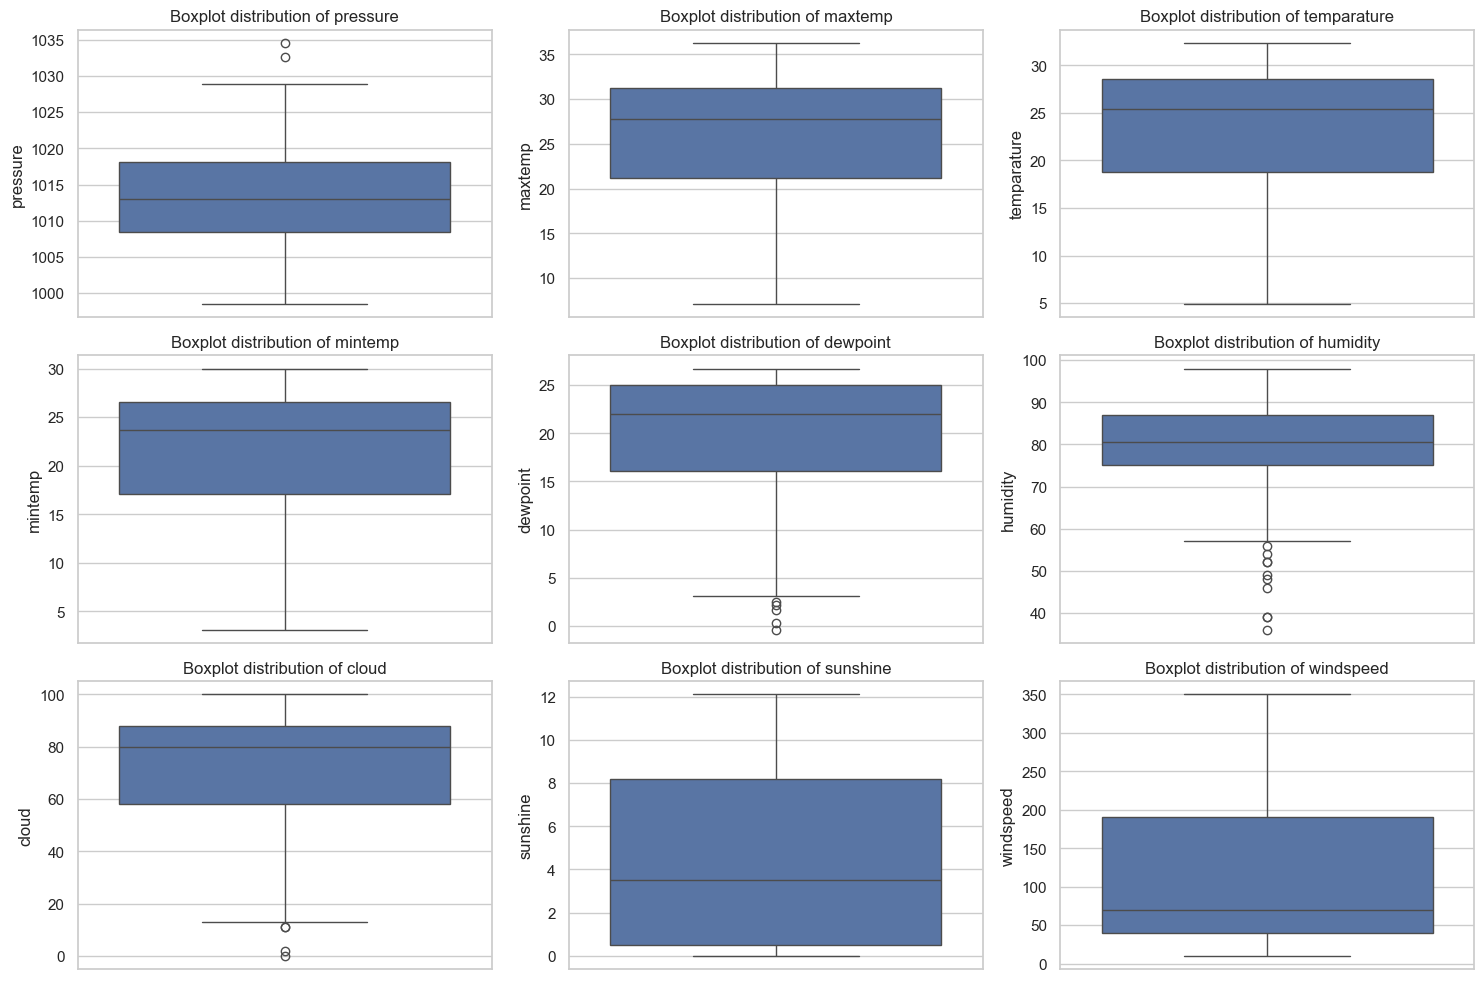

In [122]:
plt.figure(figsize = (15,10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'windspeed'],1):
    plt.subplot(3,3,i)
    sns.boxplot(rain_data[column])
    plt.title(f"Boxplot distribution of {column}")
plt.tight_layout()
plt.show()
    

In [123]:
rain_data = rain_data.drop(columns = ['maxtemp', 'temparature', 'mintemp'])

In [124]:
rain_data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,80.0
1,1022.0,15.6,81,83,1,0.6,50.0,50.0
2,1019.7,18.4,95,91,1,0.0,40.0,40.0
3,1018.9,18.8,90,88,1,1.0,50.0,50.0
4,1015.9,19.9,95,81,1,0.0,40.0,40.0


In [125]:
rain_data['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [126]:
majority = rain_data[rain_data.rainfall == 1]
minority = rain_data[rain_data.rainfall == 0]
sum_majority = majority.sample(117)

    

In [127]:
new_data = pd.concat([sum_majority,minority],axis = 0 )
new_data = new_data.sample(frac = 1,random_state = 42).reset_index(drop = True)

In [128]:
new_data['rainfall'].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

In [129]:
df_downsampled = new_data.copy()

In [130]:
# split features and target as X and y
X = df_downsampled.drop(columns=["rainfall"])
y = df_downsampled["rainfall"]

In [131]:
print(X)


     pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
0      1014.8      16.3        95     95       0.1           60.0       60.0
1      1013.4      19.5        69     17      10.5           70.0       70.0
2      1006.1      24.4        74     27      10.8          220.0      220.0
3      1008.2      25.9        82     85       7.2          220.0      220.0
4      1021.2       8.4        66     18      10.1           20.0       20.0
..        ...       ...       ...    ...       ...            ...        ...
229    1017.3      21.1        84     88       0.0           80.0       80.0
230    1008.2      25.0        85     81       2.5           90.0       90.0
231    1013.4      16.0        96    100       0.0           50.0       50.0
232    1008.3      24.1        74     29       5.7           10.0       10.0
233    1011.5      20.9        92     90       0.5           50.0       50.0

[234 rows x 7 columns]


In [132]:
print(y)

0      1
1      0
2      0
3      1
4      0
      ..
229    1
230    1
231    1
232    0
233    1
Name: rainfall, Length: 234, dtype: int64


In [133]:
# splitting the data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_features": ["sqrt", "log2"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [135]:
# Hypertuning using GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [136]:
best_rf_model = grid_search_rf.best_estimator_

print("best parameters for Random Forest:", grid_search_rf.best_params_)

best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [137]:
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.68421053 0.68421053 0.83783784 0.81081081 0.86486486]
Mean cross-validation score: 0.7763869132290185


In [138]:
# test set performance
y_pred = best_rf_model.predict(X_test)

print("Test set Accuracy:", accuracy_score(y_test, y_pred))
print("Test set Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test set Accuracy: 0.6808510638297872
Test set Confusion Matrix:
 [[14 10]
 [ 5 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.58      0.65        24
           1       0.64      0.78      0.71        23

    accuracy                           0.68        47
   macro avg       0.69      0.68      0.68        47
weighted avg       0.69      0.68      0.68        47



In [139]:
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)

input_df = pd.DataFrame([input_data], columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine','winddirection', 'windspeed'])

In [140]:
input_df

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7


In [141]:
prediction = best_rf_model.predict(input_df)

In [142]:
print(prediction)

[1]


In [143]:
prediction[0]

np.int64(1)

In [144]:
prediction = best_rf_model.predict(input_df)
print("Prediction result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction result: Rainfall


In [145]:
# save model and feature names to a pickle file
model_data = {"model": best_rf_model, "feature_names": X.columns.tolist()}

with open("rainfall_prediction_model.pkl", "wb") as file:
  pickle.dump(model_data, file)

In [146]:
import pickle
import pandas as pd

In [147]:
# load the trained model and feature names from the pickle file
with open("rainfall_prediction_model.pkl", "rb") as file:
  model_data = pickle.load(file)

In [148]:
model = model_data["model"]
feature_names = model_data["feature_names"]

In [149]:
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)

input_df = pd.DataFrame([input_data], columns=feature_names)

In [150]:
prediction = best_rf_model.predict(input_df)
print("Prediction result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction result: Rainfall
